# Suport Vector Machine (SVM) Classifier

In [1]:
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# using sci-kit learn for classifiers
from sklearn import svm
from sklearn.model_selection import train_test_split  # to split data randomly into test, train datasets
from sklearn import metrics


In [2]:
# read in signal and background data from txt files and assign target values

# SIGNAL DATA, (target value =1)
sig_data=np.loadtxt('signal10k.txt')
sig_target=np.ones(sig_data.shape[0]) # counts the number of rows in sig_data and makes a new array of 1s of that size

# BACKGROUND DATA, (target value =0)
bkg_data=np.loadtxt('background10k.txt')
bkg_target=np.zeros(bkg_data.shape[0])    # does the same as above, but fills array with 0s instead


In [3]:
# concatenate sig and bkg data into one array, then randomly split data set in half to have training and test data

X=np.concatenate((sig_data,bkg_data),0)  # join sig and bkg data on axis 0 (meaning on same plane)
Y=np.concatenate((sig_target,bkg_target),0)


# to see scatter plots, only include x1 and x2 from sig data set:
X=X[:,0:2]


# split array into random test and training datasets:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.5, random_state=1)  # set random_state=1 to keep the same value assignment throughout the program re-runs


In [4]:
# code LINEAR classifier+training
decision_fn_shape='ovo'  # use 1-versus-1 decision fn shape 

clf_name='SVM Classifier'
clf=svm.SVC(probability=True,decision_function_shape=decision_fn_shape) 
clf.fit(X_train, Y_train)

# evaluate accuracy:
Y_predict=clf.predict(X_test)
accuracy=metrics.accuracy_score(Y_test,Y_predict)
print('{} accuracy='.format(clf_name), accuracy)

C:\Users\mayap\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Classifier accuracy= 0.5038


No handles with labels found to put in legend.


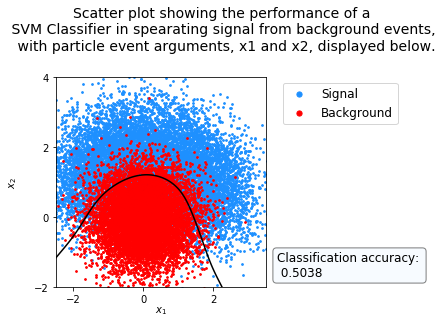

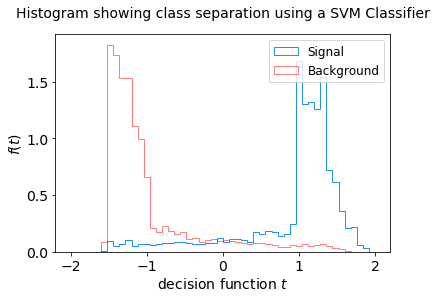

In [5]:
# Plot scatter plot to visualise
print=metrics.accuracy_score(Y_test,Y_train)

fig, ax =plt.subplots(1,1)

plt.title('Scatter plot showing the performance of a \n {} in spearating signal from background events, \n with particle event arguments, x1 and x2, displayed below.'.format(clf_name),
         fontsize=14, x=0.8, y=1.1)

# Text box properties:
props = dict(boxstyle='round', facecolor='aliceblue', alpha=0.5)
ax.text(1.05, 0.05, 'Classification accuracy: \n {}'.format(accuracy), transform=ax.transAxes, fontsize=12,
        horizontalalignment='left', bbox=props)


# formating plots
plt.gcf().subplots_adjust(bottom=0.15)    # gcf = get current figure
plt.gcf().subplots_adjust(left=0.15)
ax.set_xlim((-2.5,3.5))
ax.set_ylim((-2,4))
x0,x1= ax.get_xlim()
y0,y1= ax.get_ylim()

ax.set_aspect(abs(x1-x0)/abs(y1-y0))    # make a square plot , abs = returns absolute value

xtick_spacing=0.5
ytick_spacing=2.0
ax.yaxis.set_major_locator(ticker.MultipleLocator(xtick_spacing))
ax.yaxis.set_major_locator(ticker.MultipleLocator(ytick_spacing))
plt.scatter(sig_data[:,0], sig_data[:,1], s=3, color='dodgerblue', marker='o', label='Signal')
plt.scatter(bkg_data[:,0], bkg_data[:,1], s=3, color='red', marker='o', label='Background')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',markerscale=3, fontsize=12)

# set decision boundaries to scatter plot
x_min, x_max = X[:, 0].min()- .5, X[:, 0].max()+.5
y_min, y_max = X[:, 1].min()- .5, X[:, 1].max()+.5
h=.01 # mesh step size
xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min,y_max,h))  # returns coordinates matricies for x and y on plot


# REMOVE the following code if want to include all 3 x-axis: from here
Z=clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:, 1]    # returns prob. of the concatenated array (np.c_) along 2nd axis
                                                           # of the flattened 1D arrays of the meshgrid xx and yy (ravel)
if hasattr(clf, "decision_function"):
    Z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
else:
    Z=clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:, 1]
# till here ^^

# CLASSIFIER contour:
Z=Z.reshape(xx.shape)   # changes the shape of the xx array
plt.contour(xx,yy,Z,1,colors='k')   # arguments are: xx,yy,Z. Level= 1 means number of contour lines
plt.xlabel(r'$x_{1}$', labelpad=0)
plt.ylabel(r'$x_{2}$', labelpad=15)
#plt.savefig("scatterplot.pdf", format='pdf')




# HISTOGRAM:
plt.figure()      # new window
matplotlib.rcParams.update({'font.size':14})   # sets all font sizes
plt.title('Histogram showing class separation using a {}'.format(clf_name), x=0.5, y=1.05, fontsize=14)


# TESTS:
# depends on classifier, use predict_proba or decision_function
if hasattr(clf, "decision_function"):
    tTest= clf.decision_function(X_test)
else:
    tTest= clf.predict_proba(X_test)[:,1]

# find probabilities of the test data being background or signal
tBkg=tTest[Y_test==0]   # where our test data is actually background
tSig=tTest[Y_test==1]   # where test data is signal 

nBins=50
tMin=np.floor(np.min(tTest))
tMax=np.ceil(np.max(tTest))
bins=np.linspace(tMin, tMax, nBins+1)

plt.xlabel('decision function $t$', labelpad=3)
plt.ylabel('$f(t)$', labelpad=3)
plt.legend()

n, bins, patches = plt.hist(tSig, bins=bins, density=True, histtype='step', fill=False, color='dodgerblue', label='Signal')
n, bins, patches = plt.hist(tBkg, bins=bins, density=True, histtype='step', fill=False, color='red', alpha=0.5, label='Background')
plt.legend(fontsize=12)

#plt.savefig("decision_function_hist.pdf", format='pdf')
plt.show()